<a href="https://colab.research.google.com/github/KhaledSaiful/CIND-820-Big-Data-Project/blob/main/EDA_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explotaroty Data Analysis
Exploratory Data Analysis (EDA) stands as a pivotal stage within the data analytics process, designed to address queries from marketing teams or stakeholders in a systematic manner. This comprehensive phase involves a meticulous examination and visualization of key dataset characteristics to reveal underlying patterns, trends, and insights. Utilizing tools such as matplotlib and seaborn, EDA spans various critical steps, including data collection, summary statistics computation, data visualization through techniques like histograms and scatter plots, handling missing values and outliers, exploring data relationships, feature engineering, data transformation, dimensionality reduction, pattern recognition, hypothesis testing, and effective documentation and communication of findings. As an iterative process, each step in EDA often begets additional questions, leading to refinements and guiding subsequent analysis, feature selection, and model building in data science projects.

In [1]:
#Setting Up the Environment and Importing Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [7]:
#Previewing the Dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
#Exploring Data Characteristics
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [8]:
#Data Cleaning & Manipulation
df.groupby('Month').agg('count')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,,
Aug,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433
Dec,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727,1727
Feb,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Jul,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
June,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288
Mar,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
May,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364
Nov,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998
Oct,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549


In [9]:
#Upon examining the 'Month' column, it was observed that most months are abbreviated (e.g., JUL, AUG, DEC),
#but one entry uses 'June' instead of 'Jun'. To maintain consistency, this will be corrected. Additionally,
#there is an absence of data for January and April; these months will be excluded from the analysis for consistency.

df.loc[df['Month'] == 'June', 'Month'] = 'Jun'
# Define the order of the months
month_order = ['Feb', 'Mar', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the defined order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df.groupby('Month').agg('count')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,,
Feb,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
Mar,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
May,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364
Jun,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288
Jul,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432,432
Aug,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433,433
Sep,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448,448
Oct,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549,549
Nov,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998,2998


In [10]:
#Checking for Null Data
df.notnull().all()


Administrative             True
Administrative_Duration    True
Informational              True
Informational_Duration     True
ProductRelated             True
ProductRelated_Duration    True
BounceRates                True
ExitRates                  True
PageValues                 True
SpecialDay                 True
Month                      True
OperatingSystems           True
Browser                    True
Region                     True
TrafficType                True
VisitorType                True
Weekend                    True
Revenue                    True
dtype: bool

In-depth Analysis:
This section analyzes the data to answer the business questions identified earlier. The analysis is illustrated through both graphical and tabular formats and includes four main areas: Page Interaction Analysis, Rate Analysis, Time-Series Analysis, and Categorical Analysis.


In [11]:
# Aggregate the data using mean
page_cnt_df = df.groupby('Revenue')[['Administrative', 'Informational', 'ProductRelated']].mean().reset_index()


In [12]:
# Chage values of Revenue column to be more readable data
page_cnt_df.loc[page_cnt_df['Revenue'] == True, 'Revenue'] = 'Buyers'
page_cnt_df.loc[page_cnt_df['Revenue'] == False, 'Revenue'] = 'Non-Buyers'
page_cnt_df


,Revenue,Administrative,Informational,ProductRelated
0,Non-Buyers,2.117732,0.451833,28.714642
1,Buyers,3.393606,0.786164,48.210168


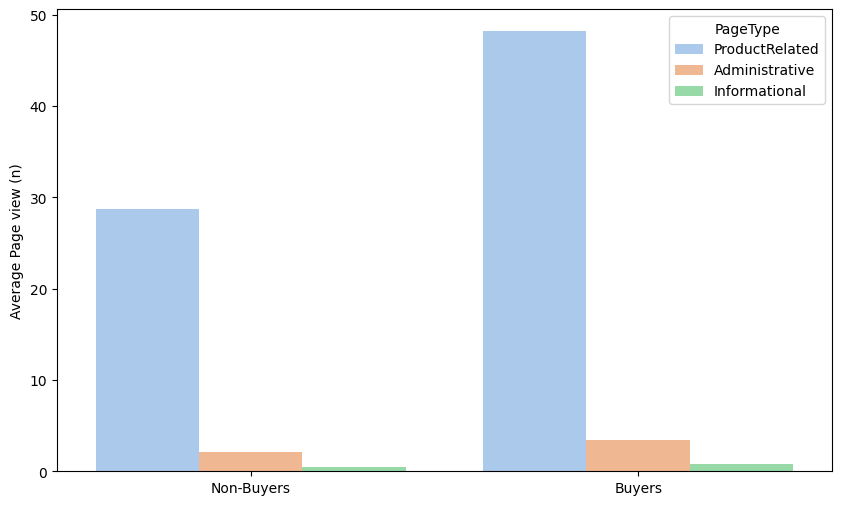

In [13]:
# Create melted df for make it easy to plot
melted_df = page_cnt_df.melt(id_vars='Revenue', value_vars=[ 'ProductRelated', 'Administrative', 'Informational'],
                            var_name='PageType', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Revenue', y='Value', hue='PageType', palette='pastel')
plt.xlabel('')
plt.ylabel('Average Page view (n)')
plt.show()


In [16]:
# Build df for duration count
page_dur_cnt = df.groupby('Revenue')[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']].mean()

# change duration in sec to minitues
page_dur_cnt = page_dur_cnt.apply(lambda x : x/60).reset_index()

# Chage values of Revenue column to be more readable data
page_dur_cnt.loc[page_dur_cnt['Revenue'] == True, 'Revenue'] = 'Buyers'
page_dur_cnt.loc[page_dur_cnt['Revenue'] == False, 'Revenue'] = 'Non-Buyers'

page_dur_cnt


,Revenue,Administrative_Duration,Informational_Duration,ProductRelated_Duration
0,Non-Buyers,1.229002,0.503937,17.83313
1,Buyers,1.991387,0.960190,31.27016


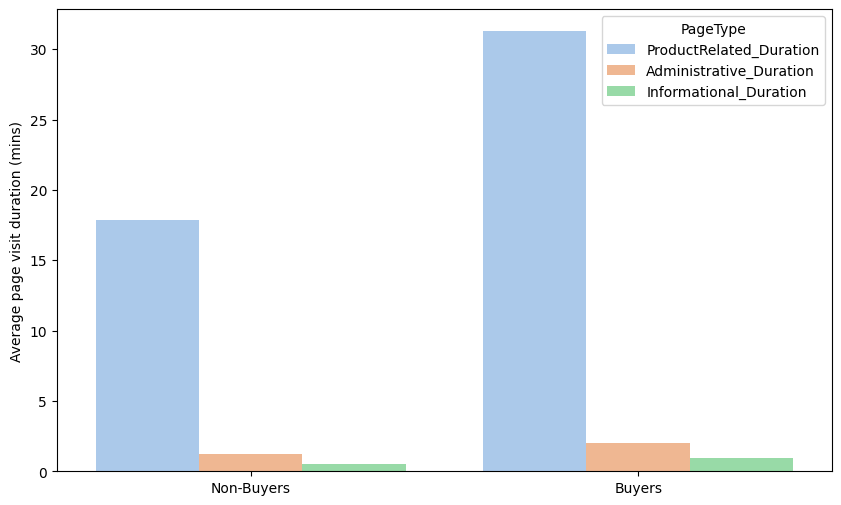

In [17]:
#Melt the dataframe for easy to plot
melt_page_dur_cnt = page_dur_cnt.melt(id_vars='Revenue',
                                      value_vars=[ 'ProductRelated_Duration', 'Administrative_Duration', 'Informational_Duration'],
                                      var_name='PageType', value_name='TotalDuration')

plt.figure(figsize=(10, 6))
sns.barplot(data=melt_page_dur_cnt,
            x='Revenue',
            y='TotalDuration',
            hue='PageType',
            palette='pastel')
plt.xlabel('')
plt.ylabel('Average page visit duration (mins)')
plt.show()


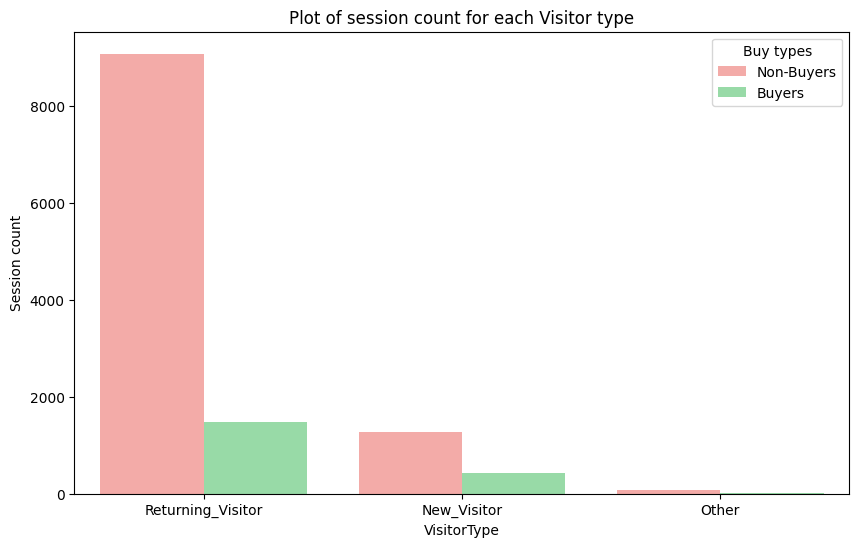

In [19]:
#Analysis of Visitor Type Numbers
#Group df
visitor_df = df.groupby(['VisitorType', 'Revenue'])['Revenue'].size().reset_index(name='cnt').sort_values('cnt', ascending=False)

#Change name
visitor_df.loc[visitor_df['Revenue']==True, 'Revenue']  = 'Buyers'
visitor_df.loc[visitor_df['Revenue']==False, 'Revenue'] = 'Non-Buyers'

#Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel')[2:4][::-1]
sns.barplot(data=visitor_df,
            x='VisitorType',
            y='cnt',
            hue='Revenue',
            palette=colors)
plt.legend(title='Buy types')
plt.ylabel("Session count")
plt.title("Plot of session count for each Visitor type")
plt.show()


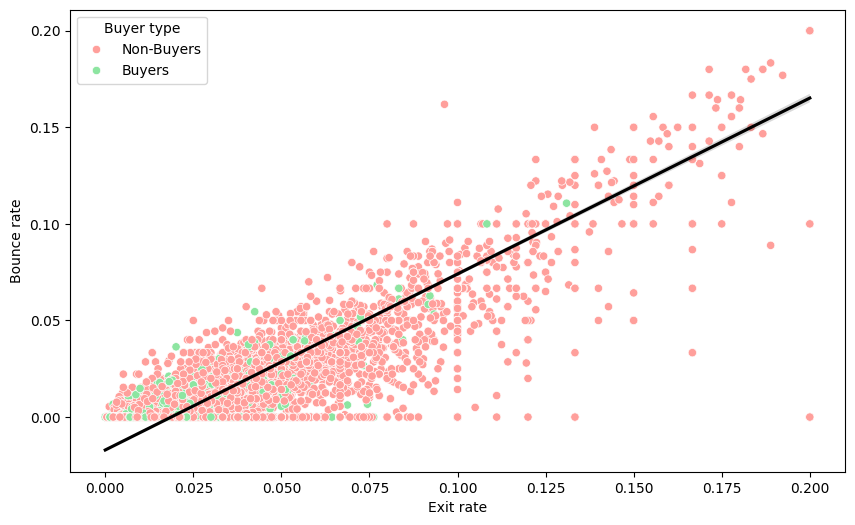

In [20]:
#Engagement metrics analysis
df_bounce_exit = df.copy()
df_bounce_exit['Revenue'] = df_bounce_exit['Revenue'].map({True: 'Buyers', False: 'Non-Buyers'})

# Define custom colors from 'pastel' palette
pastel_palette = sns.color_palette("pastel")
custom_colors = {'Buyers' : pastel_palette[2],
                 'Non-Buyers': pastel_palette[3]}  # Green for True, Red for False

# Use custom colors in scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_bounce_exit, x='ExitRates', y='BounceRates', hue='Revenue', palette=custom_colors)

# Add regression line
sns.regplot(data=df_bounce_exit, x='ExitRates', y='BounceRates', scatter=False, color='Black')

plt.xlabel('Exit rate')
plt.ylabel('Bounce rate')
plt.legend(title='Buyer type')
plt.show()


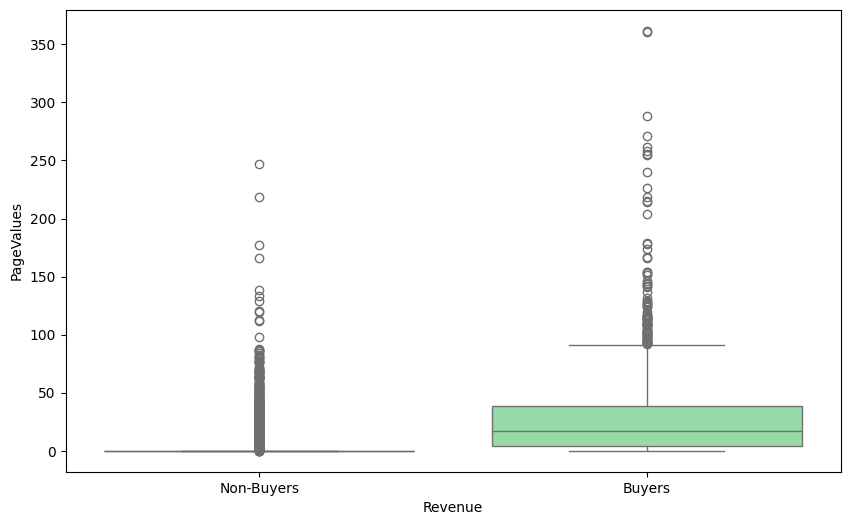

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_bounce_exit, y='PageValues', x='Revenue', palette=custom_colors)
plt.show()


In [22]:
pg_val_rev_true = df[(df['PageValues'] >0) & (df['Revenue'] == True)]['Revenue'].count()
pg_nonval_rev_true = df[(df['PageValues'] == 0) & (df['Revenue'] == True)]['Revenue'].count()
pg_val_rev_false = df[(df['PageValues'] >0) & (df['Revenue'] == False)]['Revenue'].count()
pg_nonval_rev_false = df[(df['PageValues'] == 0) & (df['Revenue'] == False)]['Revenue'].count()

# Constructing the dictionary
pg_rev_data = {
    'Session count of page value = 0': [pg_nonval_rev_true, pg_nonval_rev_false],
    'Session count of page value > 0': [pg_val_rev_true, pg_val_rev_false]}

# Creating the DataFrame
pg_rev_df = pd.DataFrame(pg_rev_data, index=['Buyers', 'Non-Buyers'])
pg_rev_df


,Session count of page value = 0,Session count of page value > 0
Buyers,370,1538
Non-Buyers,9230,1192


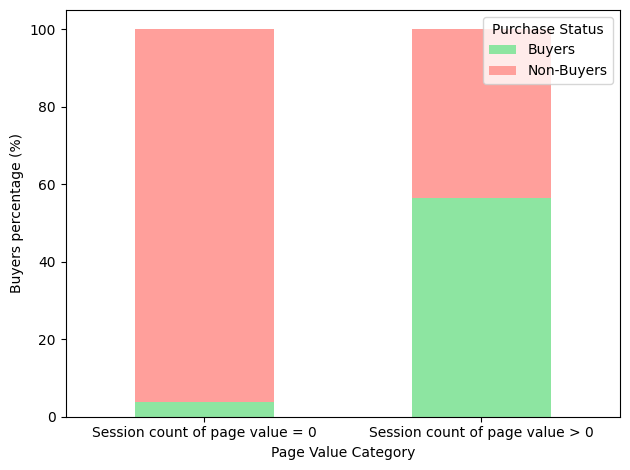

In [23]:
# Calculate the percentages across the columns, then transpose for plotting
pg_rev_df_percent = (pg_rev_df.div(pg_rev_df.sum(axis=0), axis=1) * 100).T

# Plotting
# plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel')[2:4]
pg_rev_df_percent.plot(kind='bar', stacked=True, color=colors)

# Adjusting the legend to the upper right
plt.legend(title='Purchase Status', loc='upper right')

# Rotating x-axis labels to horizontal
plt.xticks(rotation=0)

# Adding labels and title
plt.xlabel('Page Value Category')
plt.ylabel('Buyers percentage (%)')
# plt.title('Stacked Percentage of Buyers and Non-Buyers by Page Value Category')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


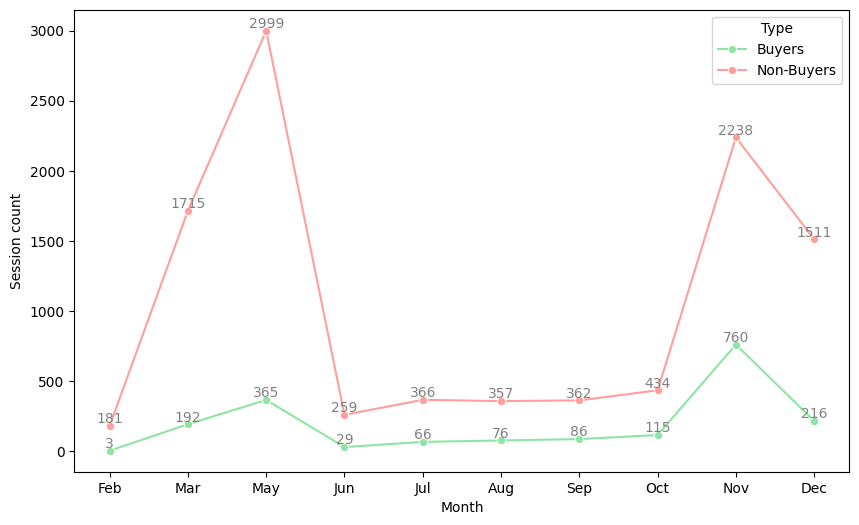

In [24]:
#Trend Analysis over Time

def annotate_plot(dataframe, column, color, ax):
    for i, point in dataframe.iterrows():
        ax.text(point['Month'], point[column], str(point[column]), color='grey', ha='center', va='bottom')
month_customer = df[df['Revenue']==True].groupby('Month')['Revenue'].agg(Buyers='count').reset_index()
month_customer['Non-Buyers']=df[df['Revenue']==False].groupby('Month')['Revenue'].agg('count').values


plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axis

# Plot and annotate for Buyers
buyers_color = sns.color_palette('pastel')[2]
sns.lineplot(data=month_customer, x='Month', y='Buyers', label='Buyers', color=buyers_color, marker='o', ax=ax)
annotate_plot(month_customer, 'Buyers', buyers_color, ax)

# Plot and annotate for Non-Buyers
non_buyers_color = sns.color_palette('pastel')[3]
sns.lineplot(data=month_customer, x='Month', y='Non-Buyers', label='Non-Buyers', color=non_buyers_color, marker='o', ax=ax)
annotate_plot(month_customer, 'Non-Buyers', non_buyers_color, ax)

plt.ylabel('Session count')
plt.legend(title="Type")
plt.show()


In [25]:
# Function to apply a style to rows
def highlight_greater_than_zero(s):
    return ['background-color: yellow' if v > 0 else '' for v in s]

special_day_df = df[['Month','SpecialDay']].groupby(['Month']).agg('mean').reset_index()

# Apply the style to the DataFrame
styled_df = special_day_df.style.apply(highlight_greater_than_zero, subset=['SpecialDay'])
styled_df


,Month,SpecialDay
0,Feb,0.233696
1,Mar,0.000000
2,May,0.212366
3,Jun,0.000000
4,Jul,0.000000
5,Aug,0.000000
6,Sep,0.000000
7,Oct,0.000000
8,Nov,0.000000
9,Dec,0.000000


In [26]:
weekend_df = df.groupby(['Weekend', 'Revenue']).size().reset_index(name='cnt')
weekend_df = weekend_df.pivot(index='Weekend', columns='Revenue', values='cnt')
# Rename the columns
weekend_df = weekend_df.rename(columns={True: 'Buyers', False: 'Non-Buyers'})
weekend_df.columns = [''.join(col).strip() for col in weekend_df.columns.values] #flattern column level

# Rename the index
weekend_df = weekend_df.rename(index={True: 'Week_end', False: 'Week_day'})

weekend_df['BuyersPct'] = weekend_df['Buyers'] / (weekend_df['Buyers'] + weekend_df['Non-Buyers']) * 100
weekend_df


,Non-Buyers,Buyers,BuyersPct
Weekend,,,
Week_day,8053,1409,14.891144
Week_end,2369,499,17.398884


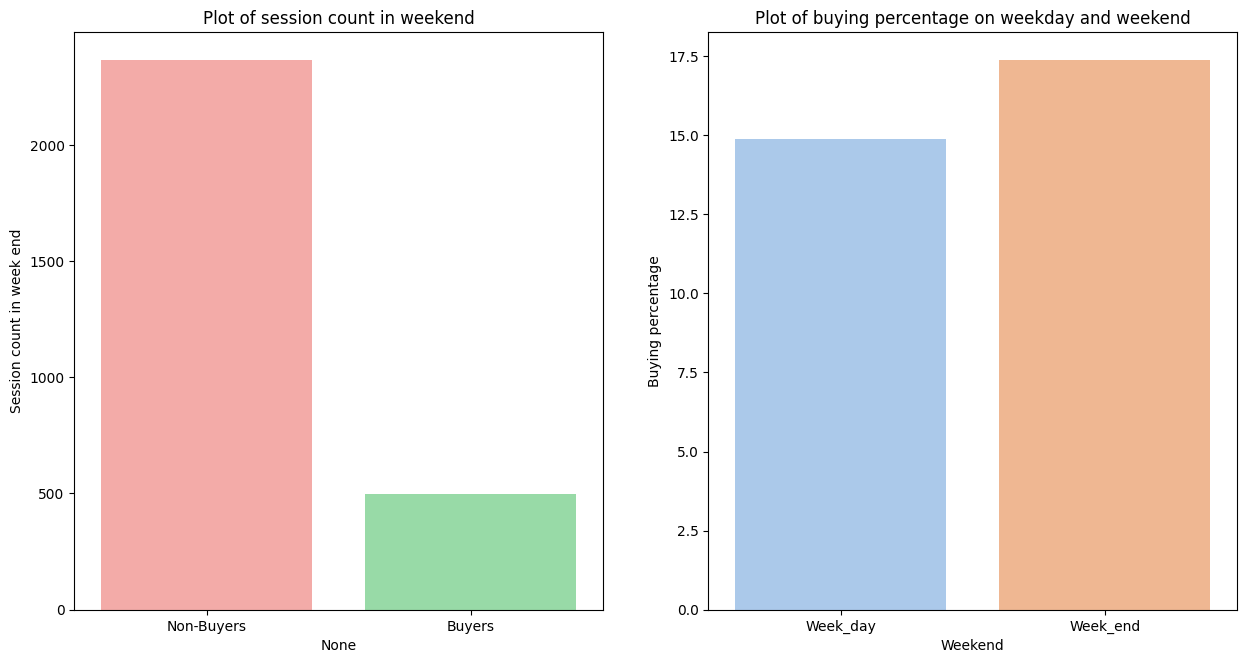

In [27]:
colors = sns.color_palette('pastel')[2:4][::-1]
plt.figure(figsize=(15, 7.5))
plt.subplot(1, 2, 1)
ax1=sns.barplot(x=weekend_df.loc['Week_end', ['Non-Buyers', 'Buyers']].index,
            y=weekend_df.loc['Week_end', ['Non-Buyers', 'Buyers']].values,
            palette=colors)
plt.ylabel("Session count in week end")
ax1.set_title("Plot of session count in weekend")


plt.subplot(1, 2, 2)
ax2=sns.barplot(x=weekend_df.index,
            y=weekend_df['BuyersPct'],
            palette='pastel')
plt.ylabel("Buying percentage")
ax2.set_title("Plot of buying percentage on weekday and weekend")

plt.show()


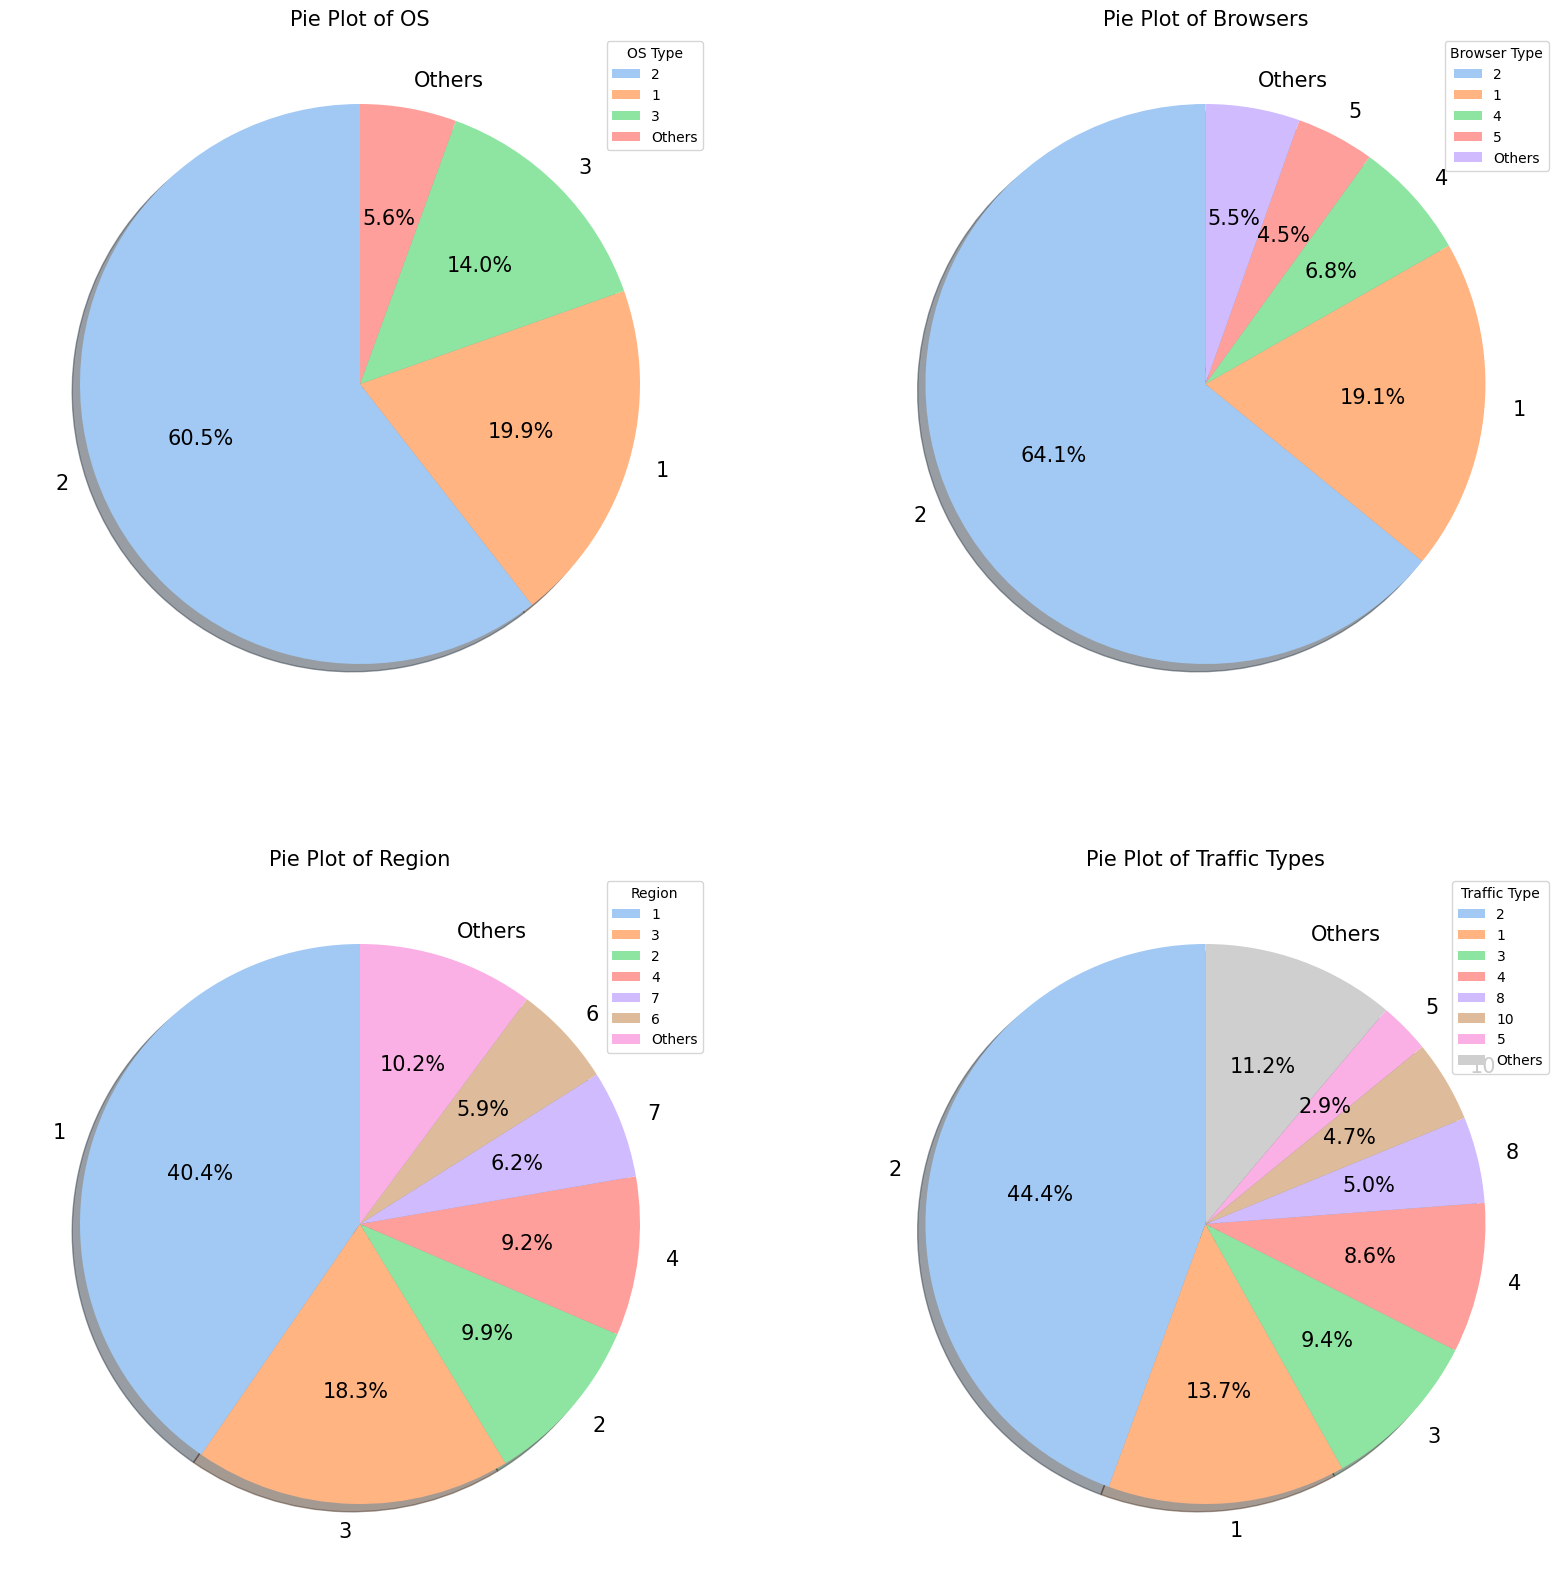

In [28]:
# Analysis with the category variables
def cut_small_portion(data, labels, threshold):
    """
    Groups small portions of data into an 'Others' category.

    :param data: Array-like, the data values for the pie chart.
    :param labels: Array-like, the labels corresponding to the data.
    :param threshold: Float, the threshold to determine small portions (as a fraction).
                      Portions contributing less than this fraction of the total are grouped.
    :return: Tuple of two elements (cut_data, cut_labels) for plotting.
    """
    # Convert to DataFrame for easier manipulation
    df = pd.DataFrame({'Label': labels, 'Data': data})

    # Sort by data value
    df.sort_values('Data', ascending=False, inplace=True)

    # Calculate the cumulative sum and total
    df['Cumulative'] = df['Data'].cumsum()
    total = df['Data'].sum()

    # Determine the cut-off point
    cutoff = total * threshold

    # Group small portions into 'Others'
    small_groups = df[df['Cumulative'] > cutoff]
    others_sum = small_groups['Data'].sum()

    # Create new DataFrame without small groups and add 'Others'
    cut_df = df[df['Cumulative'] <= cutoff]
    if others_sum > 0:
        others_df = pd.DataFrame({'Label': ['Others'], 'Data': [others_sum]})
        cut_df = pd.concat([cut_df, others_df], ignore_index=True)

    # Prepare data and labels for return
    cut_data = cut_df['Data'].values
    cut_labels = cut_df['Label'].values

    return cut_data, cut_labels

def pie_plot(ax, data, labels, colors, lg_title, title):
    ax.pie(data, labels=labels,
             autopct = '%1.1f%%',
             shadow = True,
             startangle=90, colors=colors,
             textprops={'fontsize': 15})
    ax.legend(title=lg_title)
    ax.set_title(title, fontsize=15)
OS=df.groupby('OperatingSystems')['Revenue'].agg('sum').reset_index().sort_values('Revenue')
os_colors = sns.color_palette('pastel')[0:len(OS)-1]
os_pie_data, os_pie_labels = cut_small_portion(OS['Revenue'], OS['OperatingSystems'], 0.95)

browser= df.groupby('Browser')['Revenue'].agg('sum').reset_index().sort_values('Revenue')
browser_colors = sns.color_palette('pastel')[0:len(browser)-1]
browser_pie_data, browser_pie_labels = cut_small_portion(browser['Revenue'], browser['Browser'], 0.95)

region = df.groupby('Region')['Revenue'].agg('sum').reset_index().sort_values('Revenue')
region_colors = sns.color_palette('pastel')[0:len(region)-1]
region_pie_data, region_pie_labels = cut_small_portion(region['Revenue'], region['Region'], 0.90)

traffic_type = df.groupby('TrafficType')['Revenue'].agg('sum').reset_index().sort_values('Revenue')
traffic_type_colors = sns.color_palette('pastel')[0:len(traffic_type)-1]
traffic_type_pie_data, traffic_type_pie_labels = cut_small_portion(traffic_type['Revenue'], traffic_type['TrafficType'], 0.91)

# Plotting
plt.figure(figsize=(20, 20))

# Operating Systems subplot
os_ax = plt.subplot(2, 2, 1)
pie_plot(os_ax, os_pie_data, os_pie_labels, os_colors, 'OS Type', 'Pie Plot of OS')

# Browsers subplot
browser_ax = plt.subplot(2, 2, 2)
pie_plot(browser_ax, browser_pie_data, browser_pie_labels, browser_colors, 'Browser Type', 'Pie Plot of Browsers')

# Region subplot
region_ax = plt.subplot(2, 2, 3)
pie_plot(region_ax, region_pie_data, region_pie_labels, region_colors, 'Region', 'Pie Plot of Region')

# Traffic Type subplot
traffic_type_ax = plt.subplot(2, 2, 4)
pie_plot(traffic_type_ax, traffic_type_pie_data, traffic_type_pie_labels, traffic_type_colors, 'Traffic Type', 'Pie Plot of Traffic Types')


To gain a deeper understanding of visitor behavior, the buy rates for each major category are analyzed. This will provide insights into customer behavior, differentiating between buyers and non-buyers in each category. The focus will be on the most prominent categories within OS, Browser, Region, and Traffic types.
1.	Indicates buy rates of OS group 2, 1, 3
2.	Indicates buy rates of Browser type 2, 1
3.	Indicates buy rates of Region 1, 3, 2, 4
4.	Indicates buy rates of Traffic types 2, 1, 3, 4


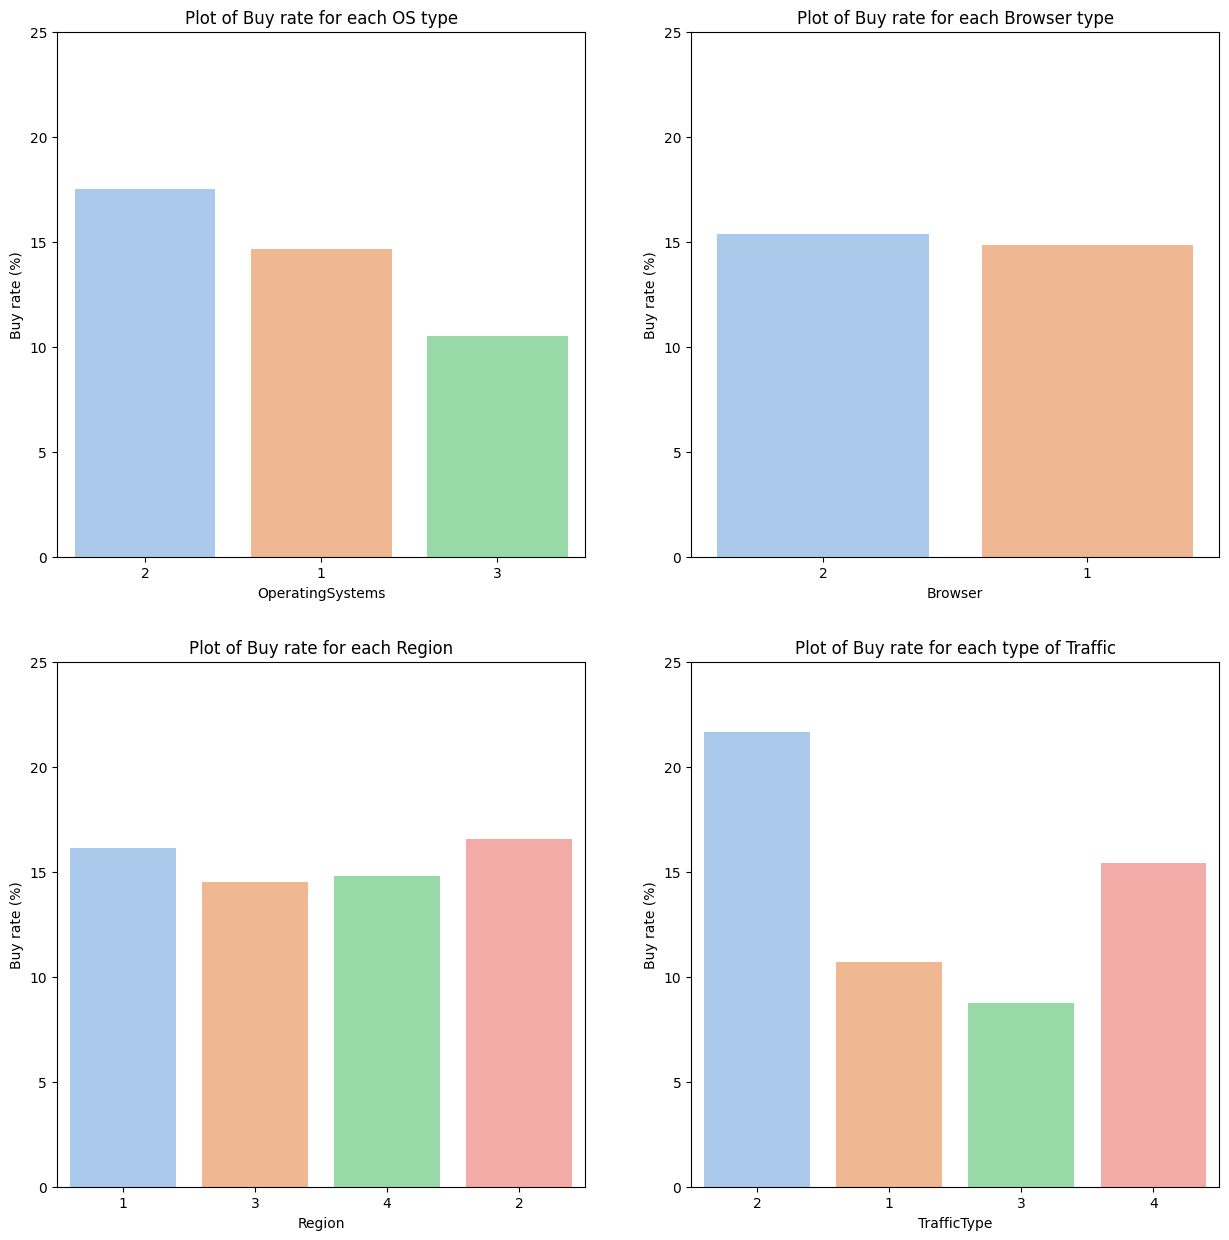

In [29]:
def get_buy_rates(df, column, id_array):
    buyrates = df[df[column].isin(id_array)].groupby([column, 'Revenue']).size().reset_index(name='cnt')
    buyrates = buyrates.pivot(index=column, columns='Revenue', values='cnt')
    buyrates['BuyRates'] = buyrates[True] / (buyrates[True] + buyrates[False]) * 100
    buyrates['TotalCount'] = buyrates[True] + buyrates[False]
    buyrates = buyrates.reset_index().sort_values('TotalCount', ascending=False) #sort data by total counts, so it will match with the pie chart
    return buyrates

def bar_plot_buyrates(ax, df, column, title):
    sns.barplot(data=df, x=column, y='BuyRates', palette='pastel', order=df[column])
    ax.set_title(title)
    ax.set_ylim(0,25)
    plt.ylabel('Buy rate (%)')
# Create new buyrates df
os_buyrates = get_buy_rates(df, 'OperatingSystems', [2,1,3])
browser_buyrates = get_buy_rates(df, 'Browser', [2,1])
region_buyrates = get_buy_rates(df, 'Region', [1,3,2,4])
traffic_buyrates = get_buy_rates(df, 'TrafficType', [2,1,3,4])

plt.figure(figsize=(15, 15))

ax1 = plt.subplot(2, 2, 1)
bar_plot_buyrates(ax1, os_buyrates, 'OperatingSystems', 'Plot of Buy rate for each OS type')

ax2 = plt.subplot(2, 2, 2)
bar_plot_buyrates(ax2, browser_buyrates, 'Browser', 'Plot of Buy rate for each Browser type')

ax3 = plt.subplot(2, 2, 3)
bar_plot_buyrates(ax3, region_buyrates, 'Region', 'Plot of Buy rate for each Region')

ax4 = plt.subplot(2, 2, 4)
bar_plot_buyrates(ax4, traffic_buyrates, 'TrafficType', 'Plot of Buy rate for each type of Traffic')

plt.show()



# Predictive modeling

This section covers the predictive modeling process, including model initialization, score interpretation, preprocessing, cross-validation, and hyperparameter tuning. The goal is to identify key features and predict the likelihood of being a Buyer, as indicated by the 'True' label in the Revenue feature. Given the dataset's class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is employed for preprocessing. A Random Forest classifier is utilized for the predictive model.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from joblib import dump, load


In [31]:
def highlight_metrics(rows, colors_for_metrics):
    style = []
    for color in colors_for_metrics:
        style.append('background-color: {}'.format(color))
    return style


In [32]:
# X = df.drop(columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Revenue'])
X = df.drop(columns=['Month', 'Revenue'])
y = df['Revenue']
SEED = 1997

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=SEED)

# Encode the data after splitting to prevent data leakage
X_train = pd.get_dummies(X_train, columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType'])
X_test = pd.get_dummies(X_test, columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType'])
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

RF = RandomForestClassifier(random_state=SEED)

RF.fit(X_train, y_train)
RandomForestClassifier
RandomForestClassifier(random_state=1997)


RandomForestClassifier(random_state=1997)

Key features:  
After fit the Random forest model, let's find the key importance features by feature_importances_ . this help to understand visitor's behavior that what is key factor for deciding purchase


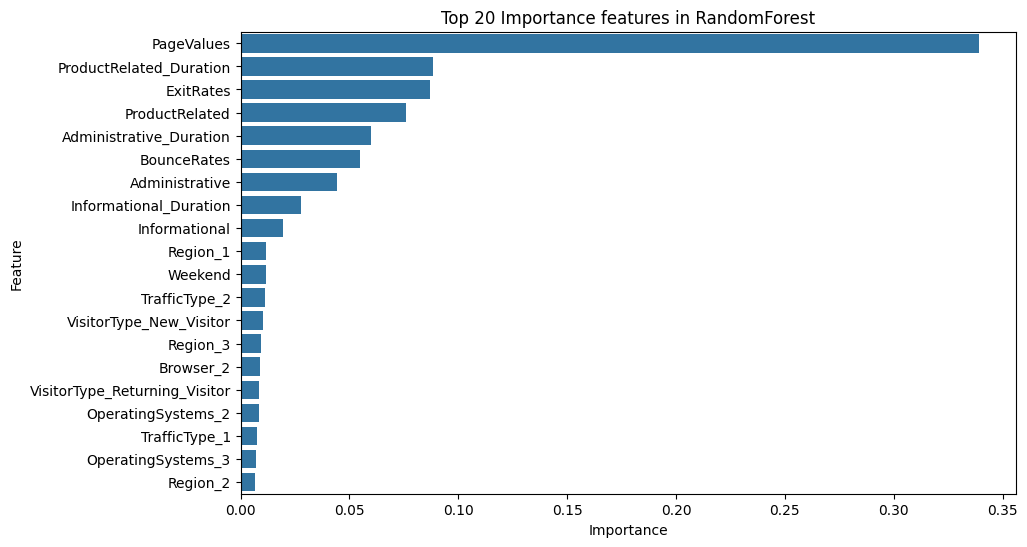

In [33]:
importances = RF.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.iloc[0:20,:])

plt.title('Top 20 Importance features in RandomForest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [34]:
# Predict the label, then interprete the first outcome.
y_pred = RF.predict(X_test)

score = RF.score(X_test, y_test)
confusion_mtrx = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report)

colors_for_metrics = [['yellow', 'yellow', 'yellow', 'None']]
style_df = report_df.style.apply(highlight_metrics, args=colors_for_metrics, subset=['True'])
style_df.format('{:.2f}')
style_df


,False,True,accuracy,macro avg,weighted avg
precision,0.91,0.73,0.89,0.82,0.89
recall,0.97,0.51,0.89,0.74,0.89
f1-score,0.94,0.60,0.89,0.77,0.89
support,3127.00,572.00,0.89,3699.00,3699.00


Upon examining the classification report, it's evident that the class imbalance significantly impacts the model's results, with a larger number of 'False' (3127) cases compared to 'True' (572). This imbalance means the model is more effective at identifying Non-Buyers, which is useful if the business goal is to develop new campaigns targeting this group. However, the model shows lower precision, recall, and f1-score for the True class, indicating it is less effective at correctly identifying potential Buyers, which is a crucial aspect if the objective is to target this demographic.
The implementation aims to accurately identify the group of actual Buyers among visitors. Thus, the focus is on maximizing both recall and precision for the positive (True) class. Recall and precision often present a trade-off in model adjustment; improving one can sometimes lead to a reduction in the other. In light of this, the f1-score, which balances precision and recall, is particularly suitable as the primary evaluation metric for this imbalanced dataset. It effectively reflects the model's performance in terms of both precision and recall, providing a more holistic view of its ability to identify potential Buyers.


# Application of SMOTE

SMOTE, or Synthetic Minority Over-sampling Technique, is used for addressing class imbalance by up-sampling the minority class based on the data from their neighbors. The goal is to balance the True/False class distribution. It's important to note that SMOTE should only be applied to the training dataset, leaving the test set untouched until evaluation.

In [35]:
#Initiate SMOTE instances
sm = SMOTE(random_state=SEED)

#Initiate Random forest
RF = RandomForestClassifier(random_state=SEED)
X_res, y_res = sm.fit_resample(X_train, y_train)
RF.fit(X_res, y_res)

y_pred = RF.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
pd.set_option('display.precision', 2)
report_df = pd.DataFrame(report)

colors_for_metrics = [['red', 'green', 'green', 'None']]
style_df = report_df.style.apply(highlight_metrics, args=colors_for_metrics, subset=['True'])
style_df.format('{:.2f}')
style_df


,False,True,accuracy,macro avg,weighted avg
precision,0.93,0.65,0.89,0.79,0.89
recall,0.94,0.63,0.89,0.79,0.89
f1-score,0.94,0.64,0.89,0.79,0.89
support,3127.00,572.00,0.89,3699.00,3699.00


After applying SMOTE preprocessing, the overall model accuracy slightly decreases from 0.90 to 0.88. The precision for the True class significantly drops from 0.73 to 0.62, while the recall for the True class increases from 0.51 to 0.68. This is a typical trade-off observed when attempting to reduce false negatives.
The model becomes more effective in correctly identifying True cases (Buyers), evidenced by the increased recall.
Despite a reduction in precision, the improved f1-score indicates enhanced overall quality of the model in classifying cases correctly.


# Cross Validation

After evaluating the performance of the RandomForestClassifier with SMOTE on the training set, cross-validation is employed to assess the model's robustness.

In [42]:
# Define the file path for saved results
# Define the file path for saved results
scores_file = '/kaggle/working/cross_validate_scores_rev2.joblib'

# Check if the saved results exist
if os.path.exists(scores_file):
    # Load the results
    scores = load(scores_file)
    print("Loaded cross-validation scores from file.")
else:
    # Define your pipeline and cross-validation
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=SEED)),
        ('rf', RandomForestClassifier(random_state=SEED))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=True, verbose=1)

    # Save the results
    dump(scores, scores_file)
    print("Cross-validation completed and results saved.")
Cross-validation completed and results saved.
scores_df = pd.DataFrame(scores)[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']].T
scores_df['avg'] = scores_df.mean(axis=1)
colors_for_metrics = [['None','red', 'green','green']]
style_df = scores_df.style.apply(highlight_metrics, args=colors_for_metrics, subset=['avg'])
style_df.format('{:.2f}')
style_df


SyntaxError: invalid syntax (<ipython-input-42-97d6597459ae>, line 23)

In [43]:
os.makedirs('/kaggle/working/', exist_ok=True)


In [44]:
# Define the file path for saved results
scores_file = '/kaggle/working/cross_validate_scores_rev2.joblib'

# Create the directory if it doesn't exist
os.makedirs('/kaggle/working/', exist_ok=True)

# Check if the saved results exist
if os.path.exists(scores_file):
    # Load the results
    scores = load(scores_file)
    print("Loaded cross-validation scores from file.")
else:
    # Define your pipeline and cross-validation
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=SEED)),
        ('rf', RandomForestClassifier(random_state=SEED))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=True, verbose=1)

    # Save the results
    dump(scores, scores_file)
    print("Cross-validation completed and results saved.")

# Rest of your code...


Cross-validation completed and results saved.


In [45]:
# Check if the saved results exist
if 'scores' in locals():
    # Results already loaded
    print("Loaded cross-validation scores.")
else:
    # Define your pipeline and cross-validation
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=SEED)),
        ('rf', RandomForestClassifier(random_state=SEED))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score=True, verbose=1)

    # Print the results
    print("Cross-validation completed.")
    print("Accuracy:", scores['test_accuracy'])
    print("Precision:", scores['test_precision'])
    print("Recall:", scores['test_recall'])
    print("F1 Score:", scores['test_f1'])

# Convert scores to a DataFrame for better visualization
scores_df = pd.DataFrame(scores)[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']].T
scores_df['avg'] = scores_df.mean(axis=1)

# Display the results in a styled DataFrame
colors_for_metrics = [['None','red', 'green','green']]
style_df = scores_df.style.apply(highlight_metrics, args=colors_for_metrics, subset=['avg'])
style_df.format('{:.2f}')
style_df


Loaded cross-validation scores.


,0,1,2,3,4,avg
test_accuracy,0.89,0.90,0.89,0.89,0.88,0.89
test_precision,0.65,0.68,0.64,0.66,0.62,0.65
test_recall,0.62,0.61,0.63,0.66,0.58,0.62
test_f1,0.64,0.64,0.63,0.66,0.60,0.64


The cross-validation results reaffirm that the recall across all folds is consistently higher than the precision. The average recall over all cross-validation folds is 0.68, a substantial improvement over the original model's recall of 0.51. This confirms that the model, after applying SMOTE, is more adept at identifying the Buyerclass (True cases) compared to the original model.
It indicates the model's enhanced capability in correctly classifying potential Buyers.
Additionally, there is an observable rise in the f1-score, averaging 0.65, compared to the initial model. This improvement in f1-score is particularly meaningful because it indicates a better balance between precision and recall


# Hyper parameter tunning

After confirming that the preprocessing method with SMOTE aligns with the expected results, the next step is to fine-tune the hyperparameters of the RandomForestClassifier. This process aims to enhance the model's capability to accurately identify Buyers.

In [47]:
# Check if the saved model exists
if 'grid_rf' in locals():
    # Model already loaded
    print("Loaded saved model.")
else:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    rf_params = {
        'smote__k_neighbors': [3, 5, 7],
        'rf__n_estimators': [100, 200],
        'rf__criterion':['gini', 'entropy'],
        'rf__min_samples_leaf':[1, 5, 10],
        'rf__max_features': ['sqrt', 'log2']
    }

    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1_score': make_scorer(f1_score),
    }

    # Initiate instances
    pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=SEED)),
        ('rf', RandomForestClassifier(random_state=SEED))
    ])

    grid_rf = GridSearchCV(estimator=pipeline, param_grid=rf_params, cv=cv, scoring=scoring, refit='f1_score', return_train_score=True)
    grid_rf.fit(X_train, y_train)

    # Print model details
    print('Best parameters:', grid_rf.best_params_)
    print('Best score:', grid_rf.best_score_)

# Display cross-validation results
cv_df = pd.DataFrame(grid_rf.cv_results_)
cv_df = cv_df[cv_df['params'] == grid_rf.best_params_][['mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score']].T
colors_for_metrics = [['None','red', 'green','green']]
style_df = cv_df.style.apply(highlight_metrics, args=colors_for_metrics)
style_df.format('{:.2f}')
style_df


Best parameters: {'rf__criterion': 'entropy', 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 10, 'rf__n_estimators': 100, 'smote__k_neighbors': 5}
Best score: 0.6645596212889783


,49
mean_test_accuracy,0.88
mean_test_precision,0.61
mean_test_recall,0.74
mean_test_f1_score,0.66
